Code.a.thon 1

Name: Yunlu Li

Email ID: yl4df


# Step 1: Big Picture and Setup

In [0]:
#import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# to make this notebook's output stable across runs
np.random.seed(42)

# To make figures look better
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Step 2: Get the Data

In [3]:
#Read in data and append column names as defined
housing = pd.read_csv('/housing.csv', sep='\s+', header=None)
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing.columns = columns
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
#Get a quick summary for each column
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [5]:
#Get a basic stats summary for each column
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


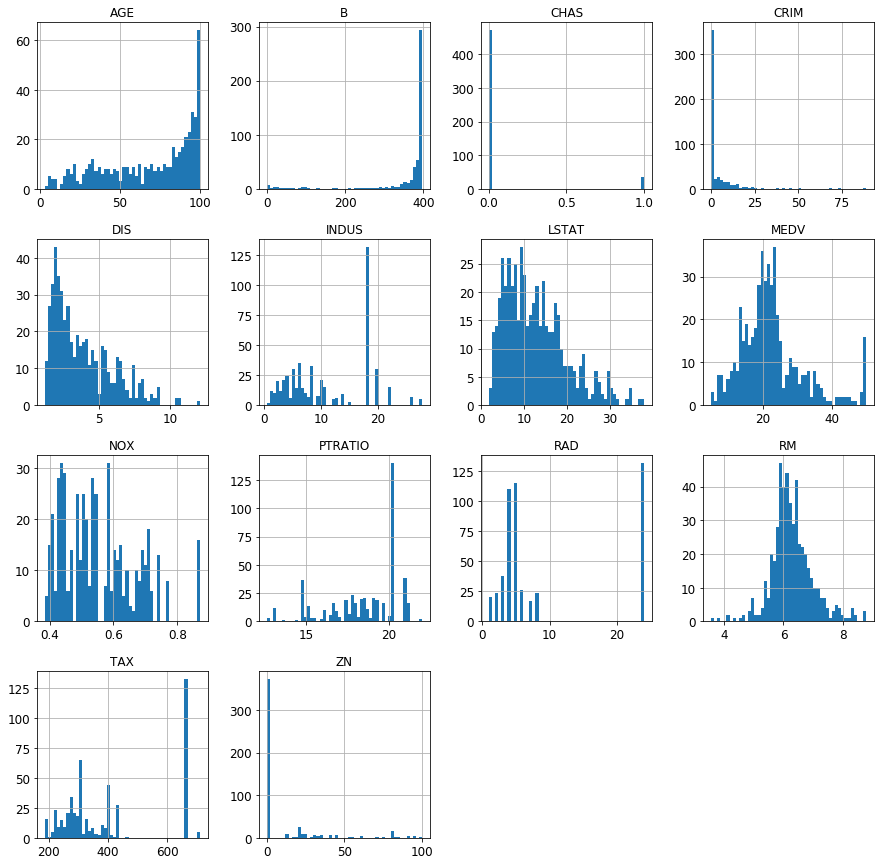

In [28]:
#Visualize each column
housing.hist(bins=50, figsize=(15,15))
plt.show()

# Step 3: Discover and Visualize the data to gain insights

In [7]:
#Look how each column correlates to MEDV (price)
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd91ae2ef0>,
      dtype=object)

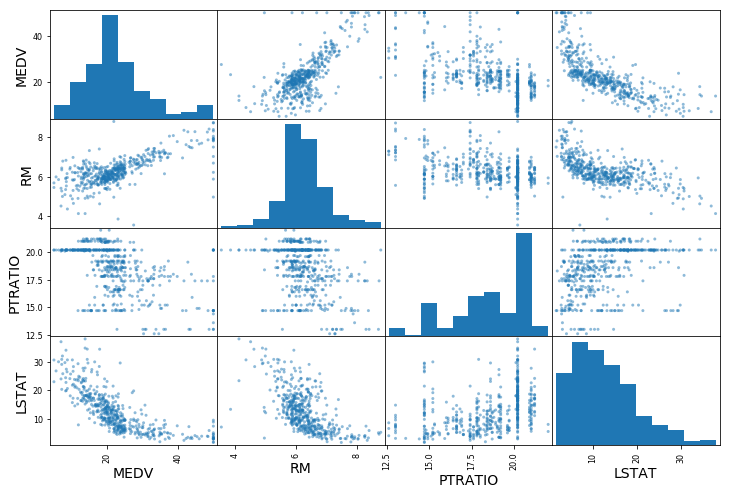

In [8]:
from pandas.plotting import scatter_matrix

attributes = ["MEDV", "RM", "PTRATIO",
              "LSTAT"]
scatter_matrix(housing[attributes], figsize=(12, 8))

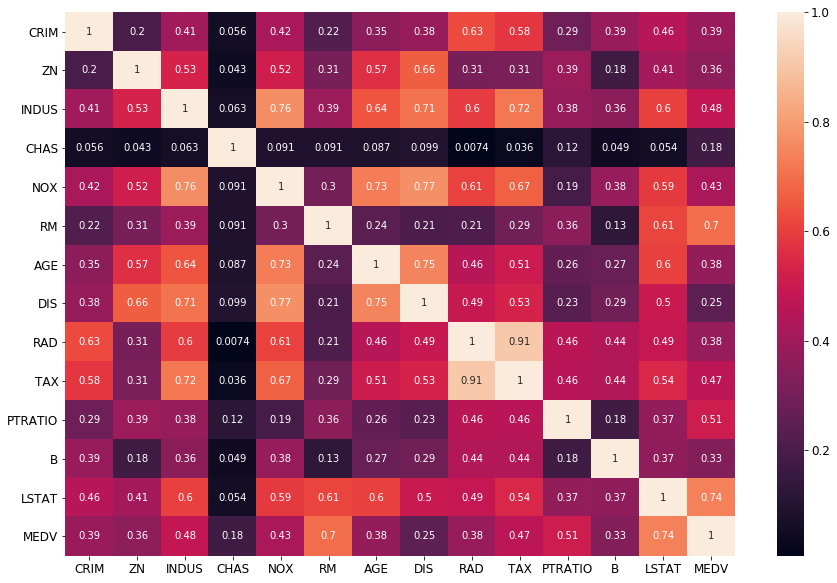

In [27]:
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.heatmap(housing.corr().abs(),  annot=True)

# Step 4: Prepare the data for Machine Learning & Step 5: Select and train models

In [23]:
#Try the first model: Linear Regression; use pipeline to combine with preprocessing StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X=housing.iloc[:, 0:13]
y=housing['MEDV']
lr_steps = [('sc', StandardScaler()),('lr',LinearRegression())]
lr_pipeline = Pipeline(lr_steps)
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size = 0.2, random_state =42)
lr_scaled = lr_pipeline.fit(X_train, y_train)
y_pred1 = lr_scaled.predict(X_test)
lr_mse = mean_squared_error(y_test, y_pred1)
lr_rmse = np.sqrt(lr_mse)
lr_rmse


4.928602182665336

In [12]:
from sklearn.model_selection import cross_val_score

lr_scores = cross_val_score(lr_pipeline, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=5)
lr_rmse_scores = np.sqrt(-lr_scores)
print(lr_rmse_scores)
print(lr_rmse_scores.mean())

[4.14750971 5.86588332 4.87168245 4.50382793 4.75856192]
4.829493065236913


In [13]:
#Try the second model: DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dtr_steps = [('sc', StandardScaler()),('dtr',DecisionTreeRegressor(random_state=42))]
dtr_pipeline = Pipeline(dtr_steps)
dtr_scaled = dtr_pipeline.fit(X_train, y_train)
y_pred2 = dtr_scaled.predict(X_test)
dtr_mse = mean_squared_error(y_test, y_pred2)
dtr_rmse = np.sqrt(dtr_mse)
dtr_rmse

4.062284685093488

In [14]:
dtr_scores = cross_val_score(dtr_pipeline, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=5)
dtr_rmse_scores = np.sqrt(-dtr_scores)
print(dtr_rmse_scores)
print(dtr_rmse_scores.mean())

[4.93924821 6.02036667 5.13067512 6.34748905 4.51727241]
5.39101029034062


In [15]:
#Try the third model: RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rfr_steps = [('sc', StandardScaler()),('rfr', RandomForestRegressor(n_estimators=190, random_state=42))]
rfr_pipeline = Pipeline(rfr_steps)
rfr_scaled = rfr_pipeline.fit(X_train, y_train)
y_pred3 = rfr_scaled.predict(X_test)
rfr_mse = mean_squared_error(y_test, y_pred3)
rfr_rmse = np.sqrt(rfr_mse)
rfr_rmse

2.9528776187064563

In [16]:
rfr_scores = cross_val_score(rfr_pipeline, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=5)
rfr_rmse_scores = np.sqrt(-rfr_scores)
print(rfr_rmse_scores)
print(rfr_rmse_scores.mean())

[3.58691703 4.8660446  3.81681612 3.25094024 3.71667779]
3.847479157328005


Based on the three models above, we can see that RandomForestRegressor perform best, so we will fine tune the RandomForestRegressor model by finding the best parameters.

# Step 6: Fine tune my model

In [17]:
#Use RandomizedSearchCV to find the best parameters (n_estimators, max_features)
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

rfr = RandomForestRegressor(random_state=42)
rds = RandomizedSearchCV(rfr, param_distributions=param_distribs,
                                n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
rds.fit(X_train, y_train)
cvres = rds.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

3.687088586870821 {'max_features': 7, 'n_estimators': 180}
3.907438845053469 {'max_features': 5, 'n_estimators': 15}
3.7119664045681895 {'max_features': 3, 'n_estimators': 72}
3.812771909139908 {'max_features': 5, 'n_estimators': 21}
3.720594337541121 {'max_features': 7, 'n_estimators': 122}
3.7131693993001167 {'max_features': 3, 'n_estimators': 75}
3.7046492261706416 {'max_features': 3, 'n_estimators': 88}
3.62620488340574 {'max_features': 5, 'n_estimators': 100}
3.715864611766861 {'max_features': 3, 'n_estimators': 150}
4.987272786953322 {'max_features': 5, 'n_estimators': 2}
3.6629428583696466 {'max_features': 4, 'n_estimators': 158}
3.597985621584698 {'max_features': 6, 'n_estimators': 130}
3.7786549831271206 {'max_features': 4, 'n_estimators': 21}
4.219494871087074 {'max_features': 1, 'n_estimators': 58}
3.5855348001978946 {'max_features': 6, 'n_estimators': 89}
4.2397766354383055 {'max_features': 1, 'n_estimators': 59}
3.6947479868437467 {'max_features': 7, 'n_estimators': 170}
3

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [18]:
#Build the final model in RandomForestRegressor with best paramaters
final_model = rds.best_estimator_
final_model.fit(X_train, y_train)
y_pred_final = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, y_pred_final)
final_rmse = np.sqrt(final_mse)
final_rmse

2.840575468209892

In [29]:
final_scores = cross_val_score(final_model, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=5)
final_rmse_scores = np.sqrt(-final_scores)
print(final_rmse_scores)
print(final_rmse_scores.mean())

[3.20686361 4.09169716 3.49800713 3.11191817 3.91985051]
3.565667314521721


# Step 7: Present Solution

For Boston Housing Dataset, after trying three different models, we found that Random Forest Regressor perform best with lowest root mean square error. Then we applied Randomized Search CV to fine tune our model. With the best parameters, our final model's prediction has RMSE 5-fold Cross Validation Score 3.56 (mean), which is an accepted and reasonable model for this dataset. 